In [1]:
import pandas as pd

credit_risk_data_path = 'credit_risk_dataset_workingon.csv'

credit_risk_data = pd.read_csv(credit_risk_data_path)

credit_risk_data_overview = credit_risk_data.head(), credit_risk_data.info()

credit_risk_data_overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


(   person_age  person_income person_home_ownership  person_emp_length  \
 0          22          59000                  RENT              123.0   
 1          21           9600                   OWN                5.0   
 2          25           9600              MORTGAGE                1.0   
 3          23          65500                  RENT                4.0   
 4          24          54400                  RENT                8.0   
 
   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
 0    PERSONAL          D      35000          16.02            1   
 1   EDUCATION          B       1000          11.14            0   
 2     MEDICAL          C       5500          12.87            1   
 3     MEDICAL          C      35000          15.23            1   
 4     MEDICAL          C      35000          14.27            1   
 
    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
 0                 0.59                         Y               

In [2]:
missing_values_summary = credit_risk_data.isnull().sum()
basic_statistics = credit_risk_data.describe()

missing_values_summary, basic_statistics


(person_age                       0
 person_income                    0
 person_home_ownership            0
 person_emp_length              895
 loan_intent                      0
 loan_grade                       0
 loan_amnt                        0
 loan_int_rate                 3116
 loan_status                      0
 loan_percent_income              0
 cb_person_default_on_file        0
 cb_person_cred_hist_length       0
 dtype: int64,
          person_age  person_income  person_emp_length     loan_amnt  \
 count  32581.000000   3.258100e+04       31686.000000  32581.000000   
 mean      27.734600   6.607485e+04           4.789686   9589.371106   
 std        6.348078   6.198312e+04           4.142630   6322.086646   
 min       20.000000   4.000000e+03           0.000000    500.000000   
 25%       23.000000   3.850000e+04           2.000000   5000.000000   
 50%       26.000000   5.500000e+04           4.000000   8000.000000   
 75%       30.000000   7.920000e+04           7.0

In [3]:
credit_risk_data['person_emp_length'].fillna(credit_risk_data['person_emp_length'].median(), inplace=True)

# Imputing missing values for `loan_int_rate` with mean
credit_risk_data['loan_int_rate'].fillna(credit_risk_data['loan_int_rate'].mean(), inplace=True)

missing_values_after_imputation = credit_risk_data.isnull().sum()
missing_values_after_imputation


C:\Users\RUSHIKESH\AppData\Local\Temp\ipykernel_18064\1663813483.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_risk_data['person_emp_length'].fillna(credit_risk_data['person_emp_length'].median(), inplace=True)
C:\Users\RUSHIKESH\AppData\Local\Temp\ipykernel_18064\1663813483.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical features
label_encoders = {}
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in categorical_columns:
    le = LabelEncoder()
    credit_risk_data[col] = le.fit_transform(credit_risk_data[col])
    label_encoders[col] = le

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['person_income', 'loan_amnt', 'loan_percent_income', 'loan_int_rate']
credit_risk_data[numerical_columns] = scaler.fit_transform(credit_risk_data[numerical_columns])

# Verify changes
print(credit_risk_data.head())


   person_age  person_income  person_home_ownership  person_emp_length  \
0          22      -0.114143                      3              123.0   
1          21      -0.911147                      2                5.0   
2          25      -0.911147                      0                1.0   
3          23      -0.009274                      3                4.0   
4          24      -0.188358                      3                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            4           3   4.019404       1.625251            1   
1            1           1  -1.358650       0.041636            0   
2            3           2  -0.646849       0.603041            1   
3            3           2   4.019404       1.368887            1   
4            3           2   4.019404       1.057357            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0             3.931411                          1           

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = credit_risk_data.drop(columns=['loan_status'])
y = credit_risk_data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the shape of training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(26064, 11) (6517, 11) (26064,) (6517,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the deep learning model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/20


C:\Users\RUSHIKESH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8220 - loss: 0.4263 - val_accuracy: 0.8542 - val_loss: 0.3471
Epoch 2/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.8666 - loss: 0.3343 - val_accuracy: 0.8680 - val_loss: 0.3266
Epoch 3/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8686 - loss: 0.3267 - val_accuracy: 0.8728 - val_loss: 0.3196
Epoch 4/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.8734 - loss: 0.3159 - val_accuracy: 0.8776 - val_loss: 0.3084
Epoch 5/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.8798 - loss: 0.3051 - val_accuracy: 0.8837 - val_loss: 0.2993
Epoch 6/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.8811 - loss: 0.3064 - val_accuracy: 0.8841 - val_loss: 0.2968
Epoch 7/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.8909 - loss: 0.2891 - val_accuracy: 0.8868 - val_loss: 0.2933
Epoch 8/20
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8898 - loss: 0.2867 - val_accurac

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


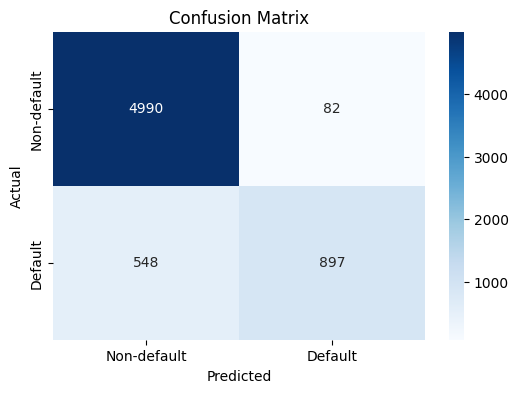

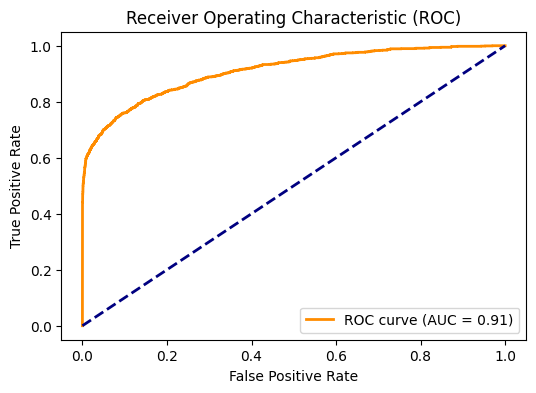

AUC: 0.91


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Predict the probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels (threshold 0.5 for binary classification)
y_pred = (y_pred_prob > 0.5).astype(int)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f"AUC: {roc_auc:.2f}")


In [8]:
model.save("loan_default_model.keras")
print("Model saved successfully in `.keras` format!")



Model saved successfully in `.keras` format!
